<a href="https://colab.research.google.com/github/czambrano26/MAT-421/blob/main/ModuleG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module G: Section 21.1, 21.2, 21.3

Section 21.1: Numerical Integration Problem Statement

---
To approximate the integral of a function f(x) over the interval [a, b], we must assume that the interval has been discretized into a numerical grid. In this numerical grid, x consists of n+1 points with spacing h = (b-a)/n. The area we would like to appoximate can be seen in the figure below. 

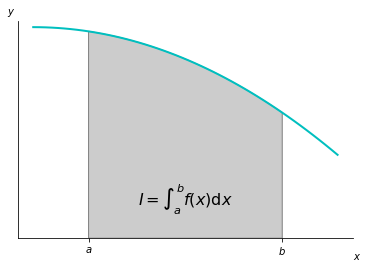

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def func(x):
    return -x**2 + 200

a, b = 2, 9  # integral limits
x = np.linspace(0, 11)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'c', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='0.5')
ax.add_patch(poly)

ax.text(0.5 * (a + b), 30, r"$I = \int_a^b f(x)\mathrm{d}x$",
        horizontalalignment='center', fontsize=16)

fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks([a, b], labels=['$a$', '$b$'])
ax.set_yticks([])

plt.show()

The rest of the chapter will show different methods of approximating the area under the curve f(x). 

Section 21.2: Riemanns Integral

---
This method approximates integrals by summing the area of rectangles that are defined for each subinterval. The width of the rectangle is h, and the height of the rectangle is defined by the function value f(x) for some x in the subinterval. We can use either the left or right endpoint to determine the height. 

As h gets small, we want to see how the accuracy improves. To determine this, we have to reqrite the integral of f(x) over an arbitrary subinterval in terms of the Taylor series. 

Instead of using the left or right endpoints, we can also use the midpoint of the rectngle. This is called the Midpoint Rule. 

Ex. Use the left Riemann Integral, right Riemann Integral, and Midpoint rule to approximate the integral of cos(x)dx from 3π/2 to 5π/2. Use 12 evenly spaced grid points over the whole interval. Compare the approximations to the exact value of 2. 

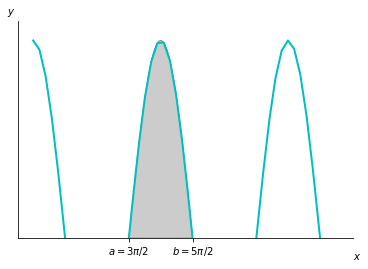

Left Riemann Integral: 1.986386986581657
Left Riemann Integral Error: 0.013613013418342979

Right Riemann Integral: 1.986386986581657
Right Riemann Integral Error: 0.013613013418342979

Midpoint Integral: 2.0068134539568834
Midpoint Integral Error: -0.006813453956883375


In [75]:
def func(x):
    return np.cos(x)

a, b = 3*math.pi/2, 5*math.pi/2  # integral limits
x = np.linspace(0, 15)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'c', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='0.5')
ax.add_patch(poly)

fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks([a, b], labels=['$a = 3π/2$', '$b = 5π/2$'])
ax.set_yticks([])
plt.show()


a = 3*math.pi/2
b = 5*math.pi/2
n = 12
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.cos(x)

I_riemannL = h * sum(f[:n-1])
err_riemannL = 2 - I_riemannL

I_riemannR = h * sum(f[1::])
err_riemannR = 2 - I_riemannR

I_mid = h * sum(np.cos((x[:n-1] \
        + x[1:])/2))
err_mid = 2 - I_mid

print(f"Left Riemann Integral: {I_riemannL}")
print(f"Left Riemann Integral Error: {err_riemannL}\n")

print(f"Right Riemann Integral: {I_riemannR}")
print(f"Right Riemann Integral Error: {err_riemannR}\n")

print(f"Midpoint Integral: {I_mid}")
print(f"Midpoint Integral Error: {err_mid}")

Section 21.3: Trapezoid Rule

---
The Trapezoid Rule fits a trapezoind into each subinterval instead of a rectangle. 

The corners of the trapezoid are at (x_i, 0), (x_(i+1), 0), (x_i, f(x_i)), and (x_(i+1), f(x_(i+1))).

Ex. Use the Trapezoid Rule to approximate the integral of cos(x)dx from 3π/2 to 5π/2. Use 12 evenly spaced grid points over the whole interval. Compare the approximations to the exact value of 2. 

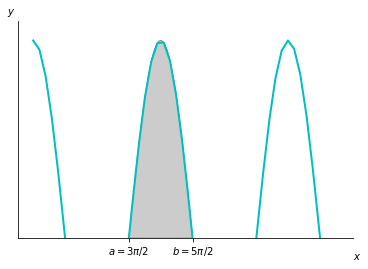

Trapezoid Integral: 1.986386986581657
Trapezoid Integral Error: 0.013613013418342979


In [78]:
def func(x):
    return np.cos(x)

a, b = 3*math.pi/2, 5*math.pi/2  # integral limits
x = np.linspace(0, 15)
y = func(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'c', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='0.5')
ax.add_patch(poly)

fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

ax.spines[['top', 'right']].set_visible(False)
ax.set_xticks([a, b], labels=['$a = 3π/2$', '$b = 5π/2$'])
ax.set_yticks([])
plt.show()


a = 3*math.pi/2
b = 5*math.pi/2
n = 12
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.cos(x)

I_trap = (h/2)*(f[0] + \
          2 * sum(f[1:n-1]) + f[n-1])
err_trap = 2 - I_trap

print(f"Trapezoid Integral: {I_trap}")
print(f"Trapezoid Integral Error: {err_trap}")